<a href="https://colab.research.google.com/github/2303A52247/Gen-AI/blob/main/Gen_AI_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9130 - loss: 0.2779 - val_accuracy: 0.9805 - val_loss: 0.0586
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 26ms/step - accuracy: 0.9860 - loss: 0.0442 - val_accuracy: 0.9898 - val_loss: 0.0286
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9905 - val_loss: 0.0288
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9901 - val_loss: 0.0278
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9962 - loss: 0.0134 - val_accuracy: 0.9903 - val_loss: 0.0285
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9966 - loss: 0.0098 - val_accuracy: 0.9902 - val_loss: 0.0340
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9921 - val_loss: 0.0285
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9976 -

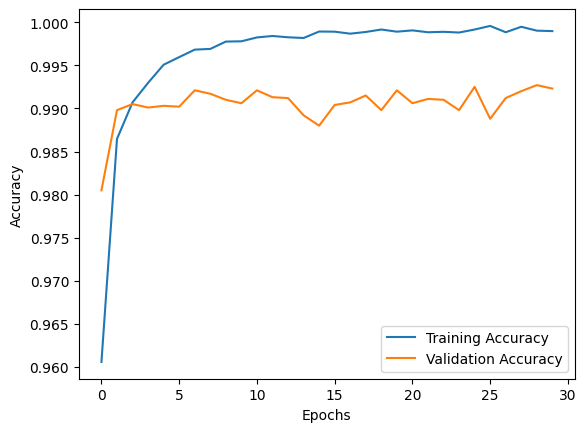

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to fit CNN input shape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

# Evaluate model performance
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Testing Accuracy: {test_acc * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()